# TASK 2: Social Media Sentiment Analysis

In [46]:
!pip install textblob
!pip install wordcloud

In [47]:
# 1. Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

# Text processing libraries
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from wordcloud import WordCloud

In [48]:
# Downloading necessary NLTK datasets
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [49]:
# 2. Loading Datasets
train_df = pd.read_csv("C:\\Users\\HP\\Desktop\\-\\BRAINWAVE Internship\\TASK 2\\data set\\Twitter Sentiment analysis NLP\\twitter_training.csv", encoding='utf-8', header=None)
val_df = pd.read_csv("C:\\Users\\HP\Desktop\\-\\BRAINWAVE Internship\\TASK 2\\data set\\Twitter Sentiment analysis NLP\\twitter_validation.csv", encoding='utf-8', header=None)

In [50]:
# 3. Rename Columns
columns = ['id', 'entity', 'sentiment', 'text']
train_df.columns = columns
val_df.columns = columns

In [51]:
# 4. Combine Training and Validation Data
df = pd.concat([train_df, val_df], ignore_index=True)

In [52]:
# Check the data
print(df.head())

     id       entity sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


In [53]:
# 5. Data Cleaning
# Drop null values
df.dropna(inplace=True)

In [54]:
# 6. Text Preprocessing

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#', '', text)  # Remove mentions and hashtags
    text = re.sub(r'[^A-Za-z0-9]+', ' ', text)  # Remove special characters
    return text

In [55]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [56]:
def preprocess(text):
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

In [57]:
# Applying cleaning and preprocessing
df['cleaned_text'] = df['text'].apply(clean_text)
df['processed_text'] = df['cleaned_text'].apply(preprocess)

###  7. Sentiment Prediction (Using TextBlob)

In [58]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

df['Predicted_Sentiment'] = df['processed_text'].apply(get_sentiment)

### 8. Visualization

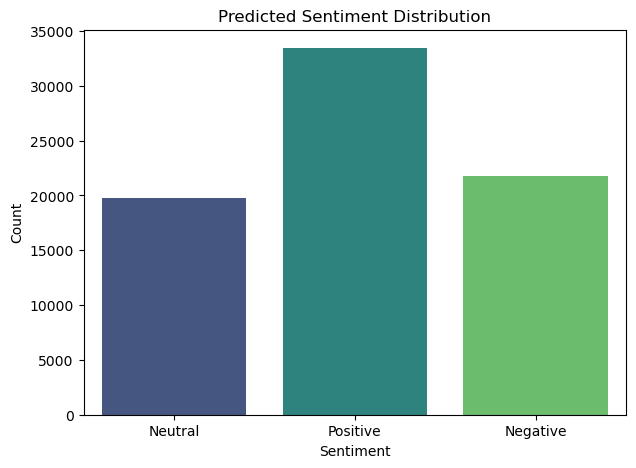

In [59]:
# 8.1 Sentiment Distribution
plt.figure(figsize=(7,5))
sns.countplot(x='Predicted_Sentiment', data=df, palette='viridis')
plt.title('Predicted Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

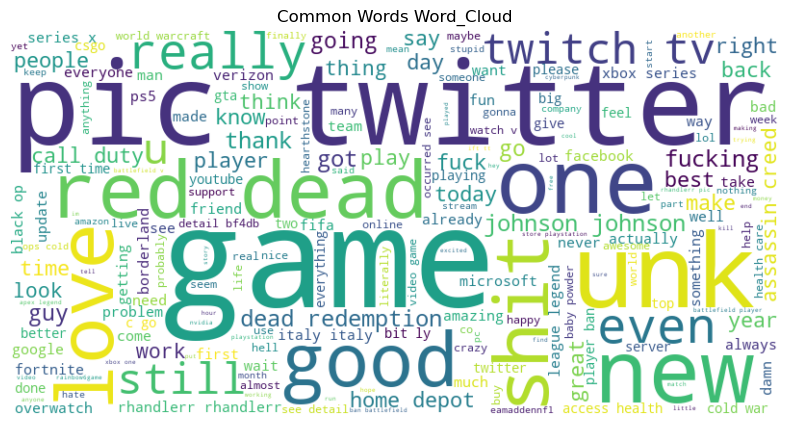

In [60]:
# 8.2 Word Cloud
text = " ".join(t for t in df['processed_text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words Word_Cloud')
plt.show()

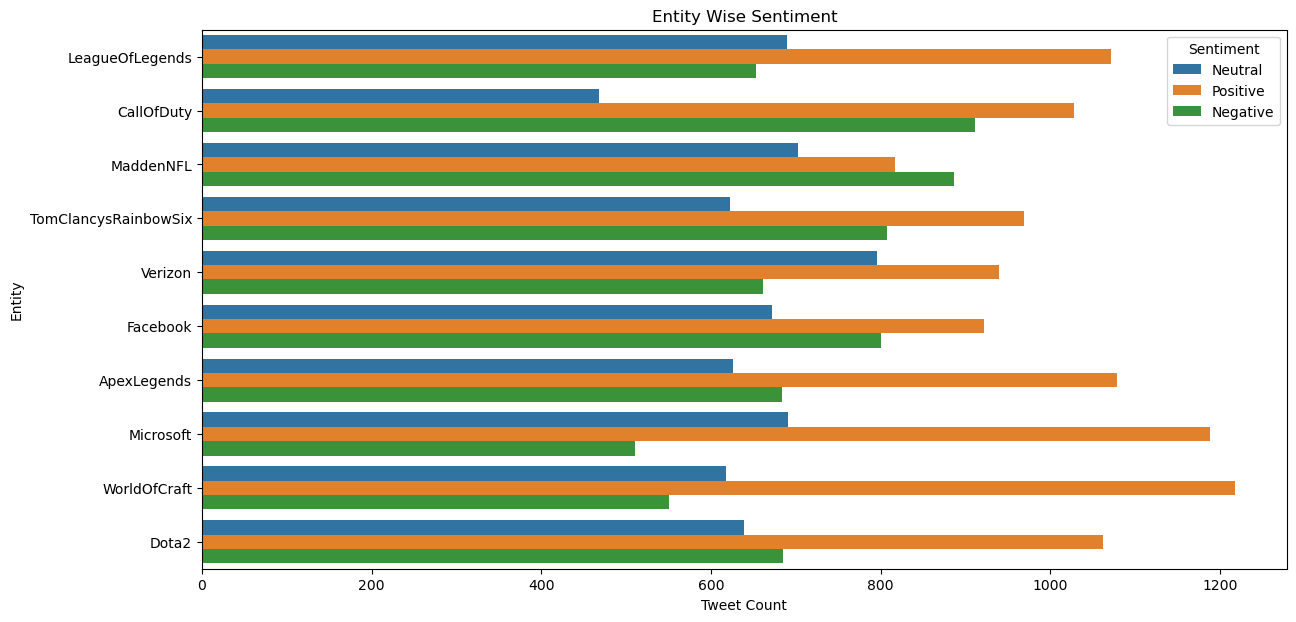

In [61]:
# 8.3 Sentiment by Entity (Top 10 Entities)
plt.figure(figsize=(14,7))
sns.countplot(y='entity', hue='Predicted_Sentiment', data=df, order=df['entity'].value_counts().index[:10])
plt.title('Entity Wise Sentiment')
plt.xlabel('Tweet Count')
plt.ylabel('Entity')
plt.legend(title='Sentiment')
plt.show()

In [62]:
# 9. Saving the Processed Dataset

df.to_csv("C://Users//HP//Desktop//-//BRAINWAVE Internship//TASK 2//processed_twitter_sentiment.csv", index=False)

print("✅ Process completed successfully!")

✅ Process completed successfully!


## Conclusion


In this project, I performed Sentiment Analysis on Twitter data using NLP techniques.

I followed these steps:

- Imported and combined the training and validation datasets
- Cleaned and preprocessed the tweet text (removing URLs, mentions, special characters, stopwords, and lemmatization)
- Predicted sentiment labels (Positive, Neutral, Negative) using TextBlob
- Visualized sentiment distribution and common words using WordClouds
- Analyzed sentiment trends across different entities

This analysis helped me understand public opinions, emotions, and reactions on Twitter towards various topics.

Future improvements could include training custom machine learning models or using advanced transformer-based models like BERT for even better sentiment predictions.